# Video Games Sales


数据文件：vgsales.csv

该数据集包含游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。

数据量：11列共1.66W数据。

基于这个数据集，可进行以下问题的探索：

电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；
预测每年电子游戏销售额。
可视化应用：如何完整清晰地展示这个销售故事。
也可以自行发现其他问题，并进行相应的挖掘。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# 加载数据并显示数据摘要

Treat Platform, Genre, and Publisher as categorical data

In [2]:
dtypes = {'Platform':'category',
          'Genre':'category',
          'Publisher':'category'}

Load the data and ignore games that are missing data

In [10]:
df = (pd.read_csv('vgsales.csv',dtype=dtypes).dropna())
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

将年份转化为整型数据

In [8]:
df['Year'] = (df['Year']
              .astype('int64'))

In [9]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null category
Year            16291 non-null int64
Genre           16291 non-null category
Publisher       16291 non-null category
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 2.4 MB


In [8]:
df['Genre'].unique()

[Sports, Platform, Racing, Role-Playing, Puzzle, ..., Simulation, Action, Fighting, Adventure, Strategy]
Length: 12
Categories (12, object): [Sports, Platform, Racing, Role-Playing, ..., Action, Fighting, Adventure, Strategy]

In [9]:
df['Publisher'].unique()

[Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, Activision, ..., Inti Creates, Takuyo, Interchannel-Holon, Rain Games, UIG Entertainment]
Length: 576
Categories (576, object): [Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, ..., Takuyo, Interchannel-Holon, Rain Games, UIG Entertainment]

In [10]:
df['Platform'].unique()

[Wii, NES, GB, DS, X360, ..., NG, TG16, 3DO, GG, PCFX]
Length: 31
Categories (31, object): [Wii, NES, GB, DS, ..., TG16, 3DO, GG, PCFX]

# 几个游戏市场的差异分析

'NA_Sales'市场最大

In [11]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg('sum')

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

日本游戏市场的概况

In [12]:
df[df['JP_Sales'] > 1]['Publisher'].value_counts()[:10]

Nintendo                        125
Sony Computer Entertainment      16
SquareSoft                       14
Namco Bandai Games               12
Konami Digital Entertainment     11
Enix Corporation                 11
Square Enix                      10
Capcom                           10
Hudson Soft                       4
ASCII Entertainment               4
Name: Publisher, dtype: int64

# 不同风格的游戏在各大市场的趋势分析

In [13]:
market_sales = (df
                .groupby('Genre')
                .agg('sum')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])

In [14]:
for column in market_sales.columns:
    market_sales[column + '_frac'] = market_sales[column] / df[column].agg('sum')

不同风格游戏在各大市场表现的可视化

<IPython.core.display.Javascript object>


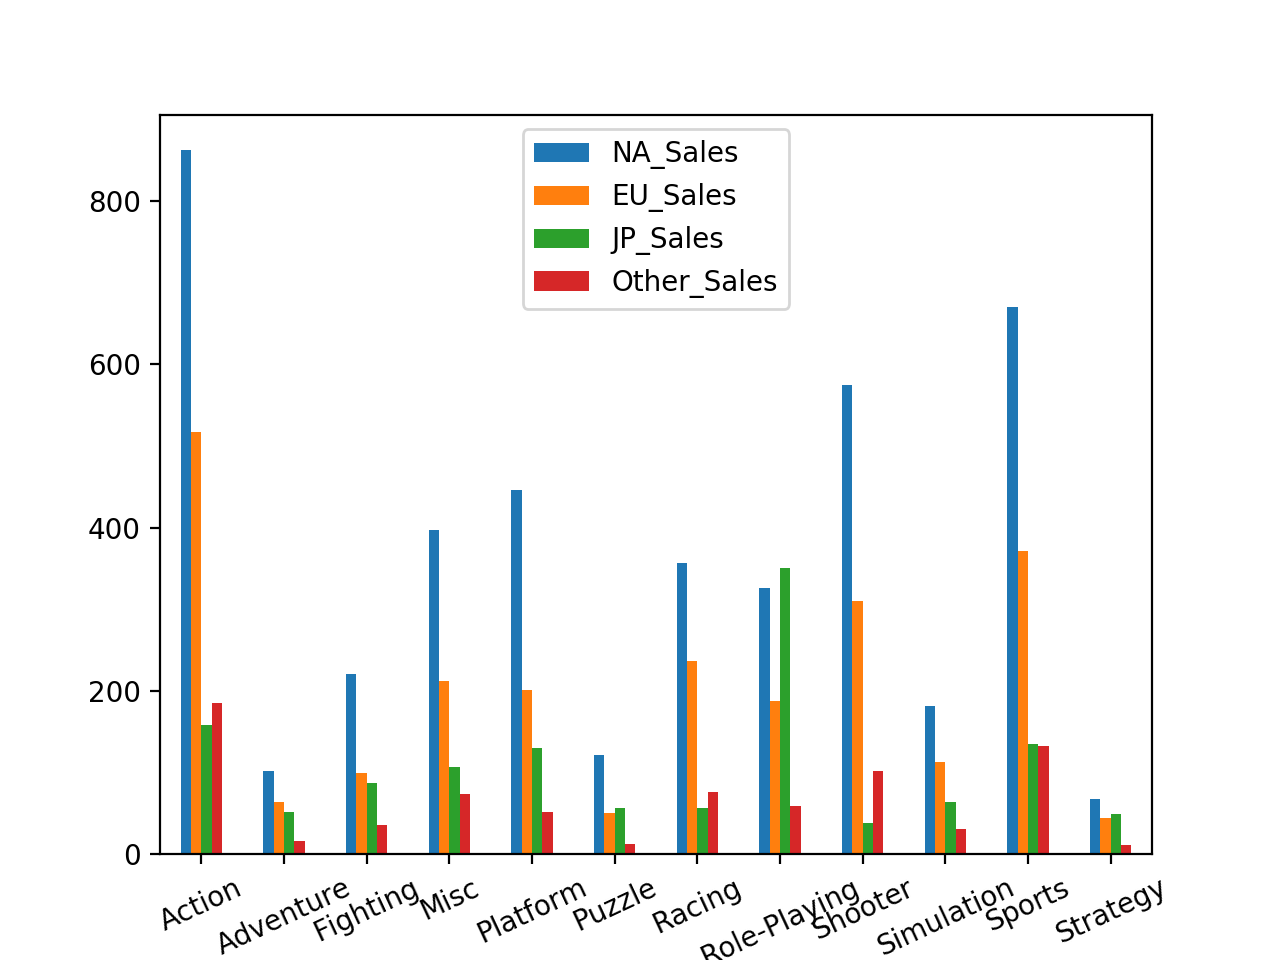

In [15]:
(market_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
 .plot
 .bar(rot=25));

把每个类型的销售额标准化到市场的总销售额。角色扮演类游戏在日本最受欢迎，而动作类、体育类和射击类游戏在其他市场中排名前三

In [16]:
(market_sales[['NA_Sales_frac', 'EU_Sales_frac', 'JP_Sales_frac', 'Other_Sales_frac']]
 .plot
 .bar(rot=25));

<IPython.core.display.Javascript object>

# 一款电子游戏的最能说明它的成功特性分析

相关性分析

In [19]:
df_ohe = pd.get_dummies(df, columns=dtypes.keys())

In [20]:
corrs = df_ohe.corr()

In [64]:
corrs['Global_Sales'].sort_values(ascending=False)[:15]

Global_Sales                             1.000000
NA_Sales                                 0.941269
EU_Sales                                 0.903264
Other_Sales                              0.747964
JP_Sales                                 0.612774
Publisher_Nintendo                       0.272672
Platform_GB                              0.102810
Platform_NES                             0.100316
Genre_Platform                           0.061817
Publisher_Electronic Arts                0.052634
Publisher_Microsoft Game Studios         0.052506
Genre_Shooter                            0.048401
Publisher_Sony Computer Entertainment    0.046616
Platform_X360                            0.044719
Publisher_Take-Two Interactive           0.044015
Name: Global_Sales, dtype: float64

In [63]:
corrs['Global_Sales'].sort_values()[:10]

Rank                           -0.426975
Year                           -0.074647
Genre_Adventure                -0.066303
Platform_PSP                   -0.053402
Platform_PC                    -0.042483
Publisher_Namco Bandai Games   -0.041960
Platform_PSV                   -0.040051
Platform_DS                    -0.038768
Genre_Strategy                 -0.037303
Publisher_Tecmo Koei           -0.035522
Name: Global_Sales, dtype: float64

使用 Random Forest 来判断特征的重要性

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
enc = OneHotEncoder()

In [36]:
X_raw = df[['Year', 'Publisher', 'Genre', 'Platform']]
X = enc.fit_transform(X_raw)

y = df['Global_Sales'].values

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
from sklearn.model_selection import GridSearchCV, KFold

In [46]:
rfr = RandomForestRegressor(n_estimators=100)
params = {'max_depth':[3, 5, 10]}

In [47]:
rf_gs = GridSearchCV(rfr,
                     param_grid=params,
                     scoring='neg_mean_squared_error',
                     cv=KFold(n_splits=5, shuffle=True),
                     return_train_score=False)

In [48]:
rf_gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=0)

In [49]:
rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
feat_impt = pd.Series(dict(zip(enc.get_feature_names(),
                               rf_gs.best_estimator_.feature_importances_)))

In [66]:
feat_impt.sort_values(ascending=False)[:15]

x1_Nintendo                       0.462542
x2_Sports                         0.132023
x3_Wii                            0.066583
x0_2006                           0.045789
x0_1985                           0.032834
x1_Electronic Arts                0.030247
x2_Platform                       0.029374
x0_1989                           0.020307
x2_Racing                         0.018549
x2_Shooter                        0.017812
x1_Microsoft Game Studios         0.015159
x2_Role-Playing                   0.013472
x0_1984                           0.012251
x1_Sony Computer Entertainment    0.010695
x0_2009                           0.009675
dtype: float64

In [52]:
year_sales = (df
              .groupby('Year')
              .agg(['mean', 'std'])['Global_Sales'])

In [53]:
df = df.merge(year_sales,
              how='outer',
              left_on='Year',
              right_index=True)

In [54]:
df['Global_Sales_zScore'] = (df['Global_Sales'] - df['mean']) / df['std']

In [57]:
X_raw = df[df['Year'] < 2019][['Publisher', 'Genre', 'Platform']]
X = enc.fit_transform(X_raw)

y = df[df['Year'] < 2019]['Global_Sales_zScore'].values

In [59]:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=5)
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
feat_impt_Z = pd.Series(dict(zip(enc.get_feature_names(),
                                 rfr.feature_importances_)))

In [67]:
feat_impt_Z.sort_values(ascending=False)[:15]

x0_Nintendo                       0.288901
x1_Sports                         0.103657
x2_Wii                            0.068127
x1_Racing                         0.063859
x2_GB                             0.058951
x0_Electronic Arts                0.041656
x2_PS4                            0.034956
x1_Shooter                        0.034400
x1_Platform                       0.032438
x1_Role-Playing                   0.028501
x0_Sony Computer Entertainment    0.025754
x0_Microsoft Game Studios         0.025291
x1_Action                         0.021919
x0_Take-Two Interactive           0.021876
x2_DS                             0.021875
dtype: float64